<a href="https://colab.research.google.com/github/Kushagratandon12/Machine-Learning-Projects/blob/master/BankNote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('/content/BankNote_Authentication.xls')

In [3]:
data = data.sample(frac=1).reset_index(drop=True)

In [4]:
data.head(5)

,variance,skewness,curtosis,entropy,class
0,-0.49241,0.89392,-1.62830,-0.56854,1
1,0.92970,-3.79710,4.64290,-0.29570,0
2,1.86640,7.77630,-0.23849,-2.96340,0
3,1.56310,0.89599,-1.97020,0.65472,1
4,5.59100,10.46430,-4.38390,-4.33790,0


In [5]:
data.tail(5)

,variance,skewness,curtosis,entropy,class
1367,-1.8391,-9.088300,9.2416,-0.10432,1
1368,-1.7279,-6.841000,8.9494,0.68058,1
1369,-2.2625,-0.099335,2.8127,0.48662,1
1370,3.8117,10.145700,-4.0463,-4.56290,0
1371,2.2634,-4.486200,3.6558,-0.61251,0


In [6]:
train_df = data[0:800].reset_index(drop=True)
validation_df = data[801:1200].reset_index(drop=True)
test_df = data[1200::].reset_index(drop=True)

In [7]:
train_df['class'].value_counts()
validation_df['class'].value_counts()
test_df['class'].value_counts()

0    96
1    76
Name: class, dtype: int64

In [8]:
train_Y =train_df['class']
train_X = train_df.loc[:, train_df.columns != 'class']

In [9]:
validation_Y =validation_df['class'].reset_index(drop=True)
validation_X = validation_df.loc[:, validation_df.columns != 'class']

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [14]:
model = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [15]:
adam = Adam(0.001)
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [16]:
history=model.fit(x=train_X,
                  y=train_Y,
                  epochs=70,
                  validation_data =(validation_X,validation_Y))

Epoch 1/70
25/25 [==============================] - 1s 11ms/step - loss: 0.8952 - accuracy: 0.4536 - val_loss: 0.8315 - val_accuracy: 0.4762
Epoch 2/70
25/25 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy: 0.4690 - val_loss: 0.7875 - val_accuracy: 0.4937
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.4843 - val_loss: 0.7497 - val_accuracy: 0.5088
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 0.7596 - accuracy: 0.5052 - val_loss: 0.7137 - val_accuracy: 0.5238
Epoch 5/70
25/25 [==============================] - 0s 3ms/step - loss: 0.7315 - accuracy: 0.5123 - val_loss: 0.6806 - val_accuracy: 0.5363
Epoch 6/70
25/25 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5422 - val_loss: 0.6479 - val_accuracy: 0.5739
Epoch 7/70
25/25 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6026 - val_loss: 0.6152 - val_accuracy: 0.7043
Epoch 8/70
25/25 [=

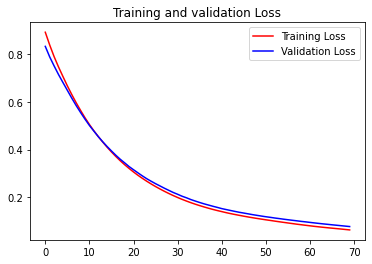

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [18]:
testing_data = test_df.loc[:, test_df.columns != 'class']

In [60]:
pred = model.predict(testing_data)
for x in range(len(pred)):
  if pred[x]<0.5:
    pred[x]=0
  else:
    pred[x]=1
# print(pred)
test_df['Predicted'] = pred

In [61]:
test_df

,variance,skewness,curtosis,entropy,class,Predicted
0,-0.11783,-1.578900,8.03000,-0.028031,0,0.0
1,-1.30660,0.252440,0.76230,1.775800,1,1.0
2,1.01820,9.109000,-0.62064,-1.712900,0,0.0
3,1.13150,7.921200,1.09300,-2.844400,0,0.0
4,4.09720,0.469720,1.66710,0.915930,0,0.0
...,...,...,...,...,...,...
167,-1.83910,-9.088300,9.24160,-0.104320,1,1.0
168,-1.72790,-6.841000,8.94940,0.680580,1,1.0
169,-2.26250,-0.099335,2.81270,0.486620,1,1.0
170,3.81170,10.145700,-4.04630,-4.562900,0,0.0


In [21]:
test_df.head(5)

,variance,skewness,curtosis,entropy,class,Predicted
0,1.64720,0.48213,4.7449,1.22500,0,0.000482
1,-2.66490,-12.81300,12.6689,-1.90820,1,0.999058
2,-1.44540,-8.43850,8.8483,0.96894,1,0.987296
3,-0.10648,-0.76771,7.7575,0.64179,0,0.001874
4,-1.13130,1.90370,7.5339,1.02200,0,0.002532


In [62]:
y_test = test_df['class']
y_pred = test_df['Predicted'].astype(int)

In [63]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.99      1.00      0.99        76

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



In [64]:
classes = [0,1]

<Figure size 432x288 with 0 Axes>

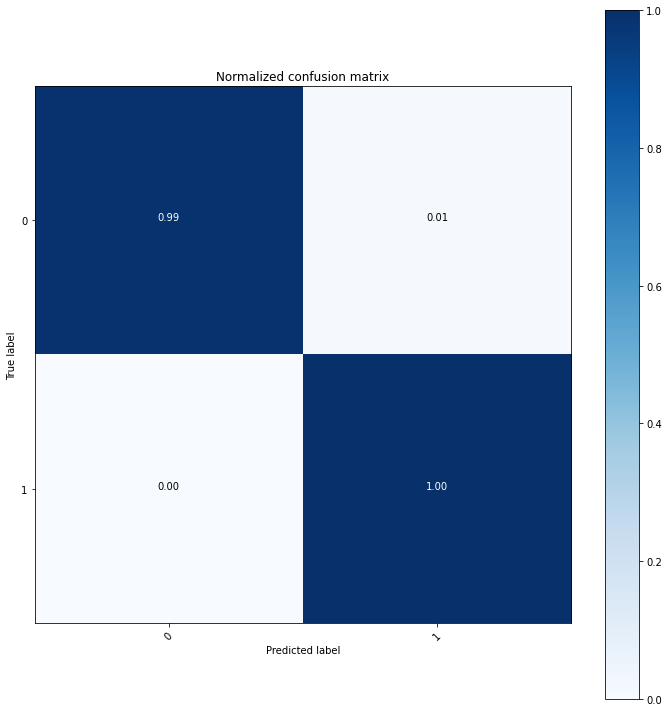

In [65]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

np.set_printoptions(precision=2)


# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, title='Normalized confusion matrix')
plt.show()